# 참고 문서
- 데이터 정보 : https://www.kaggle.com/datasets/sriharshaeedala/airline-delay/data
- EDA : https://www.kaggle.com/code/sriharshaeedala/flight-delay-data-eda

In [2]:
colab = False

In [3]:
if colab == True :
    from google.colab import drive
    drive.mount('/content/drive')
else:
  pass

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [5]:
## 코랩에서 사용
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# !pip install pyarrow

In [6]:
import os, shutil
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [7]:
# csv파일에서 parquet로 파일 경량
import pandas as pd

if colab == True :
  path = '/content/drive/MyDrive/응용/kaggle/Flight_Delay_Data/'
  # csv파일 데이터 프레임 생성
  df = pd.read_csv(path + 'Airline_Delay_Cause.csv')
  # 데이터 프레임 -> parquet 파일 축소
  df.to_parquet(path + 'Airline_Delay_Cause.parquet')
else :
  if os.path.exists('./Flight_Delay_data') == True:
      pass
      path = './Flight_Delay_data/'
      df = pd.read_csv(path + 'Airline_Delay_Cause.csv')
      # 데이터 프레임 -> parquet 파일 축소
      df.to_parquet(path + 'Airline_Delay_Cause.parquet')
  else :
    os.mkdir('./Flight_Delay_data')

In [8]:
df = pd.read_parquet(path + 'Airline_Delay_Cause.parquet')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


각 컬럼 설명


- year : 데이터 연도
- month : 데이터 월
- carrier : 운송업체 코드
- carrier_name : 운송업체 이름
- airport : 공항 코드
- airport_name : 공항 이름
- arr_flights : 도착 항공편 수
- arr_del15 : 15분 이상 지연된 항공편 수
- carrier_ct : 캐리어(캐리어로 인한 지연)
- weather_ct : 날씨(날씨로 인한 지연)
- nas_ct : NAS(NAS로 인한 지연)
- security_ct : 보안(보안으로 인한 지연)
- late_aircraft_ct : 지연 항공기(항공기 지연 도착)
- arr_cancelled : 취소된 항공편
- arr_diverted : 우회된 항공편
- arr_delay : 총 도착 지연
- carrier_delay : 운송업체로 인한 지연
- weather_delay : 날씨로 인한 지연
- nas_delay : NAS로 인한 지연
- security_delay : 보안으로 인한 지연
- late_aircraft_delay : 항공기 지연 도착으로 인한 지연

In [9]:
df.shape

(171666, 21)

In [10]:
# 데이터 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [11]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [12]:
# NaN 행 확인
df[df.isna().any(axis=1)]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
3880,2023,6,MQ,Envoy Air,CLL,"College Station/Bryan, TX: Easterwood Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,2023,6,MQ,Envoy Air,EUG,"Eugene, OR: Mahlon Sweet Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3898,2023,6,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3904,2023,6,MQ,Envoy Air,GRB,"Green Bay, WI: Green Bay Austin Straubel Inter...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3910,2023,6,MQ,Envoy Air,HPN,"White Plains, NY: Westchester County",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168602,2013,10,OO,SkyWest Airlines Inc.,LSE,"La Crosse, WI: La Crosse Regional",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169464,2013,9,F9,Frontier Airlines Inc.,MTJ,"Montrose/Delta, CO: Montrose Regional",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170096,2013,9,YV,Mesa Airlines Inc.,FAY,"Fayetteville, NC: Fayetteville Regional/Granni...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170150,2013,9,EV,ExpressJet Airlines Inc.,TPA,"Tampa, FL: Tampa International",1.0,NaN,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
# 결측치 확인
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [15]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [16]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [17]:
df[['carrier_name', 'airport_name', 'arr_flights']]

,carrier_name,airport_name,arr_flights
0,Endeavor Air Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0
1,Endeavor Air Inc.,"Albany, GA: Southwest Georgia Regional",62.0
2,Endeavor Air Inc.,"Alexandria, LA: Alexandria International",62.0
3,Endeavor Air Inc.,"Augusta, GA: Augusta Regional at Bush Field",66.0
4,Endeavor Air Inc.,"Albany, NY: Albany International",92.0
...,...,...,...
171661,Mesa Airlines Inc.,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0
171662,Mesa Airlines Inc.,"Yuma, AZ: Yuma MCAS/Yuma International",2.0
171663,Mesa Airlines Inc.,"Salt Lake City, UT: Salt Lake City International",2.0
171664,Delta Air Lines Inc.,"South Bend, IN: South Bend International",1.0


In [18]:
custom_df = df[['carrier_name', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']]

In [19]:
custom_df.head()

,carrier_name,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,Endeavor Air Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,Endeavor Air Inc.,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,Endeavor Air Inc.,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,Endeavor Air Inc.,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,Endeavor Air Inc.,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [20]:
custom_df.groupby(['carrier_name', 'airport_name', 'arr_flights']).count()

arr_del15  \
carrier_name                airport_name                                    arr_flights              
AirTran Airways Corporation Akron, OH: Akron-Canton Regional                2.0                  1   
                                                                            60.0                 1   
                                                                            62.0                 1   
                                                                            88.0                 1   
                                                                            155.0                1   
...                                                                                            ...   
Virgin America              Washington, DC: Washington Dulles International 151.0                1   
                                                                            152.0                2   
                                                                            158.0                1   
                                                                            166.0                1   
                                                                            172.0                1   

                                                                                         carrier_ct  \
carrier_name                airport_name                                    arr_flights               
AirTran Airways Corporation Akron, OH: Akron-Canton Regional                2.0                   1   
                                                                            60.0                  1   
                                                                            62.0                  1   
                                                                            88.0                  1   
                                                                            155.0                 1   
...                                                                                             ...   
Virgin America              Washington, DC: Washington Dulles International 151.0                 1   
                                                                            152.0                 2   
                                                                            158.0                 1   
                                                                            166.0                 1   
                                                                            172.0                 1   

                                                                                         weather_ct  \
carrier_name                airport_name                                    arr_flights               
AirTran Airways Corporation Akron, OH: Akron-Canton Regional                2.0                   1   
                                                                            60.0                  1   
                                                                            62.0                  1   
                                                                            88.0                  1   
                                                                            155.0                 1   
...                                                                                             ...   
Virgin America              Washington, DC: Washington Dulles International 151.0                 1   
                                                                            152.0                 2   
                                                                            158.0                 1   
                                                                            166.0                 1   
                                                                            172.0                 1   

                                                                                  

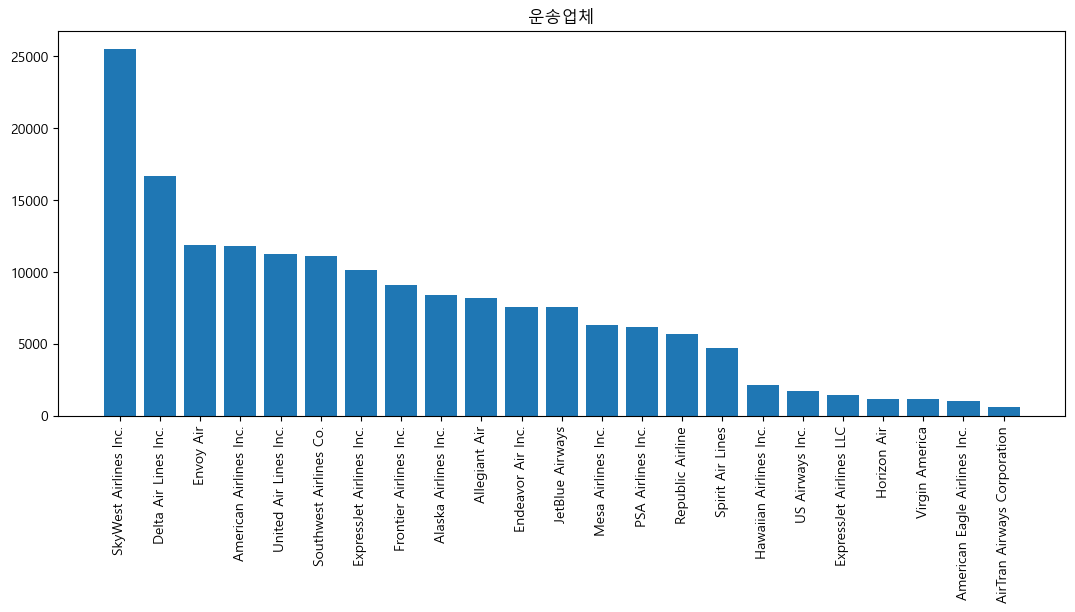

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.bar(x=custom_df['carrier_name'].value_counts().index, height=custom_df['carrier_name'].value_counts())

plt.title('운송업체')
plt.xticks(rotation=90)

plt.show()

In [22]:
custom_df['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.           25521
Delta Air Lines Inc.            16669
Envoy Air                       11859
American Airlines Inc.          11809
United Air Lines Inc.           11236
Southwest Airlines Co.          11109
ExpressJet Airlines Inc.        10114
Frontier Airlines Inc.           9088
Alaska Airlines Inc.             8365
Allegiant Air                    8217
Endeavor Air Inc.                7559
JetBlue Airways                  7547
Mesa Airlines Inc.               6341
PSA Airlines Inc.                6183
Republic Airline                 5702
Spirit Air Lines                 4689
Hawaiian Airlines Inc.           2156
US Airways Inc.                  1708
ExpressJet Airlines LLC          1419
Horizon Air                      1157
Virgin America                   1132
American Eagle Airlines Inc.     1044
AirTran Airways Corporation       599
Name: count, dtype: int64

In [23]:
country_list = df['airport_name'].tolist()

In [24]:
new_country = []
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
for _ in country_list:
    new_country.append(_.split(',')[0])

In [25]:
df['country'] = new_country

In [26]:
df['country'].value_counts()

country
Washington               2742
New York                 2320
Portland                 2299
Chicago                  1917
Houston                  1908
                         ... 
Florence                    8
Inyokern                    4
Williamsport                3
Fort Collins/Loveland       1
Youngstown/Warren           1
Name: count, Length: 373, dtype: int64

In [27]:
df['country'].value_counts()[:10]

country
Washington        2742
New York          2320
Portland          2299
Chicago           1917
Houston           1908
Columbus          1645
Detroit           1535
Austin            1526
Raleigh/Durham    1515
New Orleans       1512
Name: count, dtype: int64

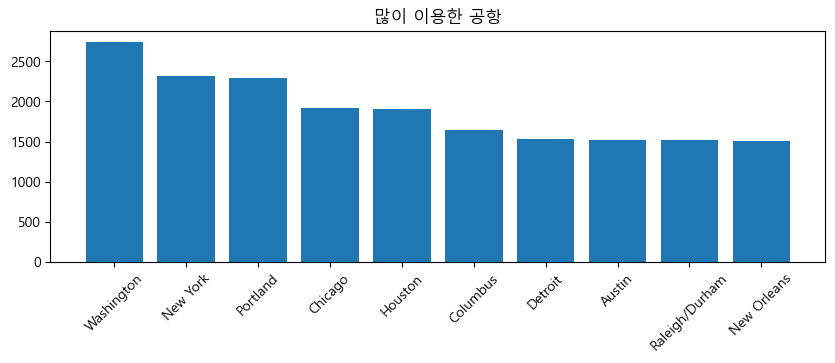

In [28]:
plt.figure(figsize=(10, 3))
plt.bar(x=df['country'].value_counts()[:10].index, height=df['country'].value_counts()[:10])

plt.title('많이 이용한 공항')
plt.xticks(rotation=45)
plt.show()

In [29]:
a = df[['carrier_name', 'arr_cancelled']].groupby('carrier_name').sum()

In [30]:
a['arr_cancelled'].sort_values(ascending=False)

carrier_name
Southwest Airlines Co.          275976.0
American Airlines Inc.          167452.0
SkyWest Airlines Inc.           138734.0
United Air Lines Inc.            86780.0
ExpressJet Airlines Inc.         85834.0
Delta Air Lines Inc.             85376.0
Envoy Air                        74187.0
JetBlue Airways                  59486.0
Republic Airline                 55324.0
PSA Airlines Inc.                43833.0
Spirit Air Lines                 34027.0
Endeavor Air Inc.                31506.0
Mesa Airlines Inc.               30339.0
Alaska Airlines Inc.             25876.0
Allegiant Air                    23307.0
Frontier Airlines Inc.           22037.0
American Eagle Airlines Inc.     15074.0
US Airways Inc.                  12167.0
ExpressJet Airlines LLC           8173.0
Hawaiian Airlines Inc.            4849.0
Horizon Air                       3608.0
Virgin America                    3156.0
AirTran Airways Corporation       1812.0
Name: arr_cancelled, dtype: float64

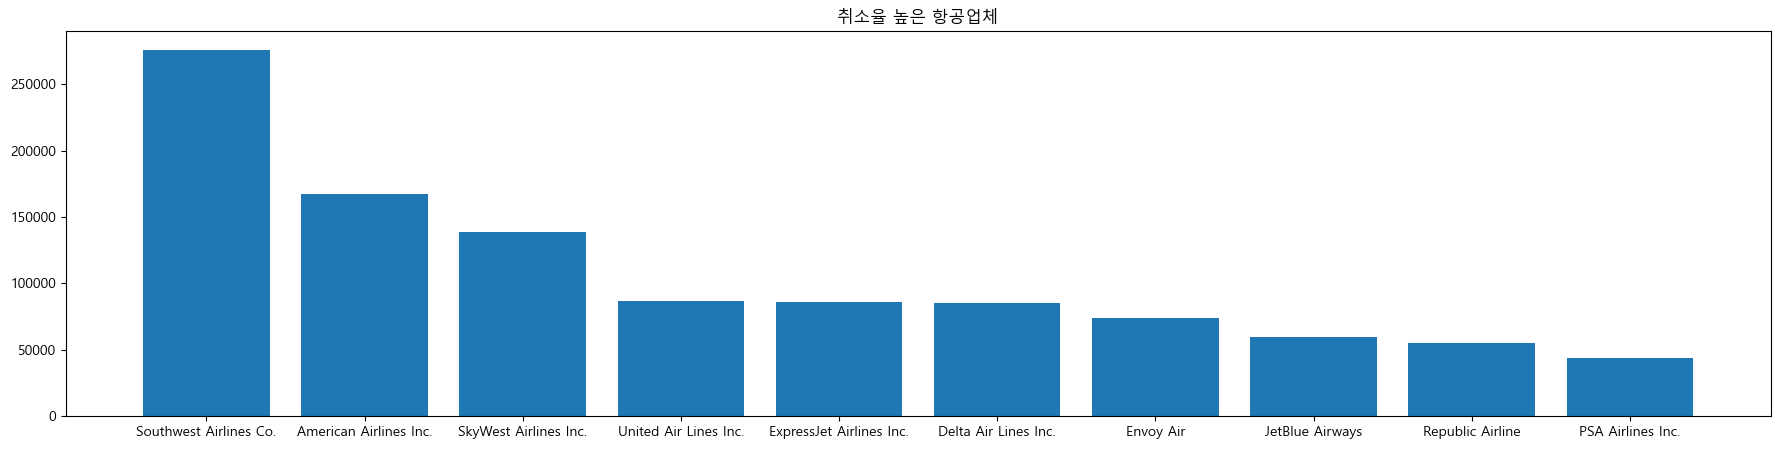

In [31]:
plt.figure(figsize=(22, 5))
plt.bar(x=a['arr_cancelled'].sort_values(ascending=False).head(10).index, height=a['arr_cancelled'].sort_values(ascending=False).head(10))

plt.title('취소율 높은 항공업체')
plt.show()

In [45]:
# int -> str 형변환
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

In [43]:
# 신규 컬럼 date = yyyy-mm 형식 생성
df['date'] = df['year'].map(str) + '-' + df['month'].map(str)

In [46]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,country,date
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,Allentown/Bethlehem/Easton,2023-8
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0,Albany,2023-8
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0,Alexandria,2023-8
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,Augusta,2023-8
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,Albany,2023-8


In [57]:
test = df[df['carrier_name'] == 'SkyWest Airlines Inc.'].sort_values(by='date')
test[:5]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,country,date
168589,2013,10,OO,SkyWest Airlines Inc.,JAC,"Jackson, WY: Jackson Hole",62.0,4.0,2.59,0.00,...,0.0,0.0,370.0,263.0,0.0,4.0,0.0,103.0,Jackson,2013-10
168569,2013,10,OO,SkyWest Airlines Inc.,DSM,"Des Moines, IA: Des Moines International",126.0,29.0,9.48,1.83,...,0.0,0.0,1425.0,598.0,71.0,196.0,0.0,560.0,Des Moines,2013-10
168570,2013,10,OO,SkyWest Airlines Inc.,COS,"Colorado Springs, CO: City of Colorado Springs...",461.0,103.0,35.09,0.97,...,2.0,0.0,5037.0,1758.0,40.0,844.0,0.0,2395.0,Colorado Springs,2013-10
168571,2013,10,OO,SkyWest Airlines Inc.,RAP,"Rapid City, SD: Rapid City Regional",178.0,18.0,8.70,0.60,...,17.0,0.0,990.0,429.0,30.0,186.0,0.0,345.0,Rapid City,2013-10
168572,2013,10,OO,SkyWest Airlines Inc.,BUR,"Burbank, CA: Bob Hope",417.0,46.0,7.26,0.00,...,6.0,1.0,2654.0,562.0,0.0,228.0,0.0,1864.0,Burbank,2013-10
